In [9]:
!pip install gdown  # Ensure gdown is installed

In [10]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1SaWujw0lPNXHj9t2HMTI3CEWn5LtARLv"
output_file = "Emotions_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1SaWujw0lPNXHj9t2HMTI3CEWn5LtARLv
From (redirected): https://drive.google.com/uc?id=1SaWujw0lPNXHj9t2HMTI3CEWn5LtARLv&confirm=t&uuid=9c549a59-5a75-499b-b191-3918a712d60c
To: /content/Emotions_Datasets.zip
100%|██████████| 35.7M/35.7M [00:00<00:00, 126MB/s]


'Emotions_Datasets.zip'

In [11]:
import zipfile
z = zipfile.ZipFile('/content/Emotions_Datasets.zip')
z.extractall()

In [12]:
import os
import shutil

src = 'Emotions_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Emotions_Datasets' to 'datasets/Emotions_Datasets' successfully.


## **Importing libraries**

In [13]:
import yaml

# Define YAML configuration
data = {
    'path': 'Emotions_Datasets',
    'train': 'train',
    'val': 'train',
    'nc': 6,
    'names': ['anger','fear','happiness','neutrality','sadness','surprise']
}

# Save to pothole.yaml
with open('Emotions_Datasets.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Emotions_Datasets.yaml created successfully!")


Emotions_Datasets.yaml created successfully!


In [14]:
!pip install ultralytics

In [15]:
from ultralytics import YOLO

# Load a YOLOv11 classification model
model = YOLO('yolo11l-cls.pt')  # Replace with 'yolo11m-cls.pt' or similar for better accuracy

# Train the classification model
model.train(
    data='Emotions_Datasets',  # Make sure this is for classification
    epochs=50,
    imgsz=224,           # Classification models usually use smaller image sizes like 224 or 256
    batch=8,
    name='Emotions_Datasets_yolo11',
    save=True,
    save_period=-1,      # Only save the best
    patience=20,
    val=True             # Enable validation to track best model
)


Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Emotions_Datasets, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Emotions_Datasets_yolo112, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0,

train: Scanning /content/datasets/Emotions_Datasets/train... 3940 images, 0 corrupt: 100%|██████████| 3940/3940 [00:00<00:00, 5903.30it/s]

train: New cache created: /content/datasets/Emotions_Datasets/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 110.4±77.2 MB/s, size: 9.2 KB)


val: Scanning /content/datasets/Emotions_Datasets/test... 50 images, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 7148.00it/s]

val: New cache created: /content/datasets/Emotions_Datasets/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/Emotions_Datasets_yolo112
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.30it/s]

                   all       0.46          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.77it/s]

                   all       0.34          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.49it/s]

                   all       0.48          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.55it/s]

                   all       0.52          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.35it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 14.66it/s]

                   all       0.46          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.77it/s]

                   all       0.48          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.48it/s]

                   all       0.58          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.36it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50      1.63G     0.9747          4        224: 100%|██████████| 493/493 [00:49<00:00, 10.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 26.26it/s]

                   all       0.48          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50      1.75G     0.9613          4        224: 100%|██████████| 493/493 [00:48<00:00, 10.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.84it/s]


                   all       0.46          1

      Epoch    GPU_mem       loss  Instances       Size


      12/50      1.79G     0.9088          4        224: 100%|██████████| 493/493 [00:48<00:00, 10.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 26.55it/s]

                   all       0.54          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50      1.87G     0.9222          4        224: 100%|██████████| 493/493 [00:49<00:00, 10.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 26.33it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50      1.95G     0.8821          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.73it/s]

                   all       0.54          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50      1.99G      0.867          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.55it/s]

                   all       0.52          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50      2.07G     0.8477          4        224: 100%|██████████| 493/493 [00:50<00:00,  9.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 14.21it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50      2.19G     0.8247          4        224: 100%|██████████| 493/493 [00:50<00:00,  9.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 14.59it/s]

                   all       0.56          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50      2.22G     0.8256          4        224: 100%|██████████| 493/493 [00:49<00:00, 10.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.36it/s]

                   all       0.56          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50       2.3G     0.8146          4        224: 100%|██████████| 493/493 [00:50<00:00,  9.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.31it/s]

                   all       0.52          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50      2.39G      0.782          4        224: 100%|██████████| 493/493 [00:49<00:00, 10.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.03it/s]

                   all       0.54          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50      2.44G     0.7801          4        224: 100%|██████████| 493/493 [00:51<00:00,  9.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 14.66it/s]

                   all       0.52          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50      2.55G     0.7576          4        224: 100%|██████████| 493/493 [00:52<00:00,  9.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.46it/s]

                   all       0.62          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50       2.6G     0.7322          4        224: 100%|██████████| 493/493 [00:52<00:00,  9.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.31it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50      2.67G     0.7415          4        224: 100%|██████████| 493/493 [00:51<00:00,  9.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.92it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50      2.75G     0.7058          4        224: 100%|██████████| 493/493 [00:50<00:00,  9.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.81it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50      2.81G     0.7013          4        224: 100%|██████████| 493/493 [00:50<00:00,  9.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.68it/s]


                   all       0.58          1

      Epoch    GPU_mem       loss  Instances       Size


      27/50      2.89G      0.697          4        224: 100%|██████████| 493/493 [00:52<00:00,  9.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.12it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50      2.97G     0.6855          4        224: 100%|██████████| 493/493 [00:50<00:00,  9.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.91it/s]

                   all        0.7          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50      3.03G     0.6551          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.22it/s]

                   all       0.68          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50      3.14G     0.6388          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.75it/s]

                   all       0.62          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50      3.18G     0.6541          4        224: 100%|██████████| 493/493 [00:49<00:00, 10.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.75it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50      3.27G     0.6201          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.85it/s]

                   all       0.58          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50      3.33G     0.6245          4        224: 100%|██████████| 493/493 [00:49<00:00, 10.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.56it/s]

                   all       0.58          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50       3.4G     0.6038          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.70it/s]

                   all       0.66          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50      3.48G     0.5776          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.53it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50      3.56G     0.5709          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.29it/s]

                   all       0.56          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50      3.62G     0.5581          4        224: 100%|██████████| 493/493 [00:50<00:00,  9.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.75it/s]

                   all       0.56          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50      3.74G      0.545          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.21it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50      3.78G     0.5203          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.60it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50      3.87G     0.5098          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 26.24it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50      3.92G     0.5003          4        224: 100%|██████████| 493/493 [00:52<00:00,  9.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.17it/s]

                   all       0.66          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50      3.98G       0.48          4        224: 100%|██████████| 493/493 [00:50<00:00,  9.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.18it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50       4.1G     0.4676          4        224: 100%|██████████| 493/493 [00:49<00:00, 10.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.73it/s]

                   all       0.66          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50      4.14G      0.441          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.47it/s]

                   all        0.6          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50      4.23G     0.4315          4        224: 100%|██████████| 493/493 [00:50<00:00,  9.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.80it/s]

                   all       0.64          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50      4.28G     0.4099          4        224: 100%|██████████| 493/493 [00:50<00:00,  9.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.45it/s]

                   all       0.66          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50      4.38G     0.4174          4        224: 100%|██████████| 493/493 [00:50<00:00,  9.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.82it/s]

                   all       0.62          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50      4.46G     0.4042          4        224: 100%|██████████| 493/493 [00:49<00:00,  9.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.73it/s]

                   all       0.62          1


EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 28, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

48 epochs completed in 0.679 hours.
Optimizer stripped from runs/classify/Emotions_Datasets_yolo112/weights/last.pt, 25.9MB
Optimizer stripped from runs/classify/Emotions_Datasets_yolo112/weights/best.pt, 25.9MB

Validating runs/classify/Emotions_Datasets_yolo112/weights/best.pt...
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-cls summary (fused): 94 layers, 12,824,837 parameters, 0 gradients, 49.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/Emotions_Datasets/train... found 3940 images in 5 classes ✅ 
val: /content/datasets/Emotions_Datasets/test... found 50 images in 5 classes ✅ 
test: /content/datasets/Emotio

               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 12.21it/s]


                   all        0.7          1
Speed: 0.4ms preprocess, 4.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/classify/Emotions_Datasets_yolo112


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b797f092990>
curves: []
curves_results: []
fitness: 0.8499999940395355
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.699999988079071, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8499999940395355}
save_dir: PosixPath('runs/classify/Emotions_Datasets_yolo112')
speed: {'preprocess': 0.4460601999926439, 'inference': 4.60906377998981, 'loss': 0.0015148599959502462, 'postprocess': 0.05238212001131615}
task: 'classify'
top1: 0.699999988079071
top5: 1.0


image 1/1 /content/datasets/Emotions_Datasets/test/fear/images - 2020-11-06T184434.298_face.png: 224x224 anger 0.39, sadness 0.23, neutrality 0.22, happiness 0.11, fear 0.05, 19.9ms
Speed: 17.9ms preprocess, 19.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Emotions_Datasets/test/anger/images - 2020-11-06T003600.349_face.png: 224x224 anger 0.60, fear 0.29, neutrality 0.09, sadness 0.02, happiness 0.00, 9.4ms
Speed: 2.5ms preprocess, 9.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Emotions_Datasets/test/happiness/6847890921_db53631dda_b_face.png: 224x224 happiness 0.84, sadness 0.10, anger 0.05, neutrality 0.01, fear 0.00, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Emotions_Datasets/test/anger/images - 2020-11-06T003605.320_face.png: 224x224 anger 0.54, sadness 0.37, neutrality 0.06, happiness 0.02

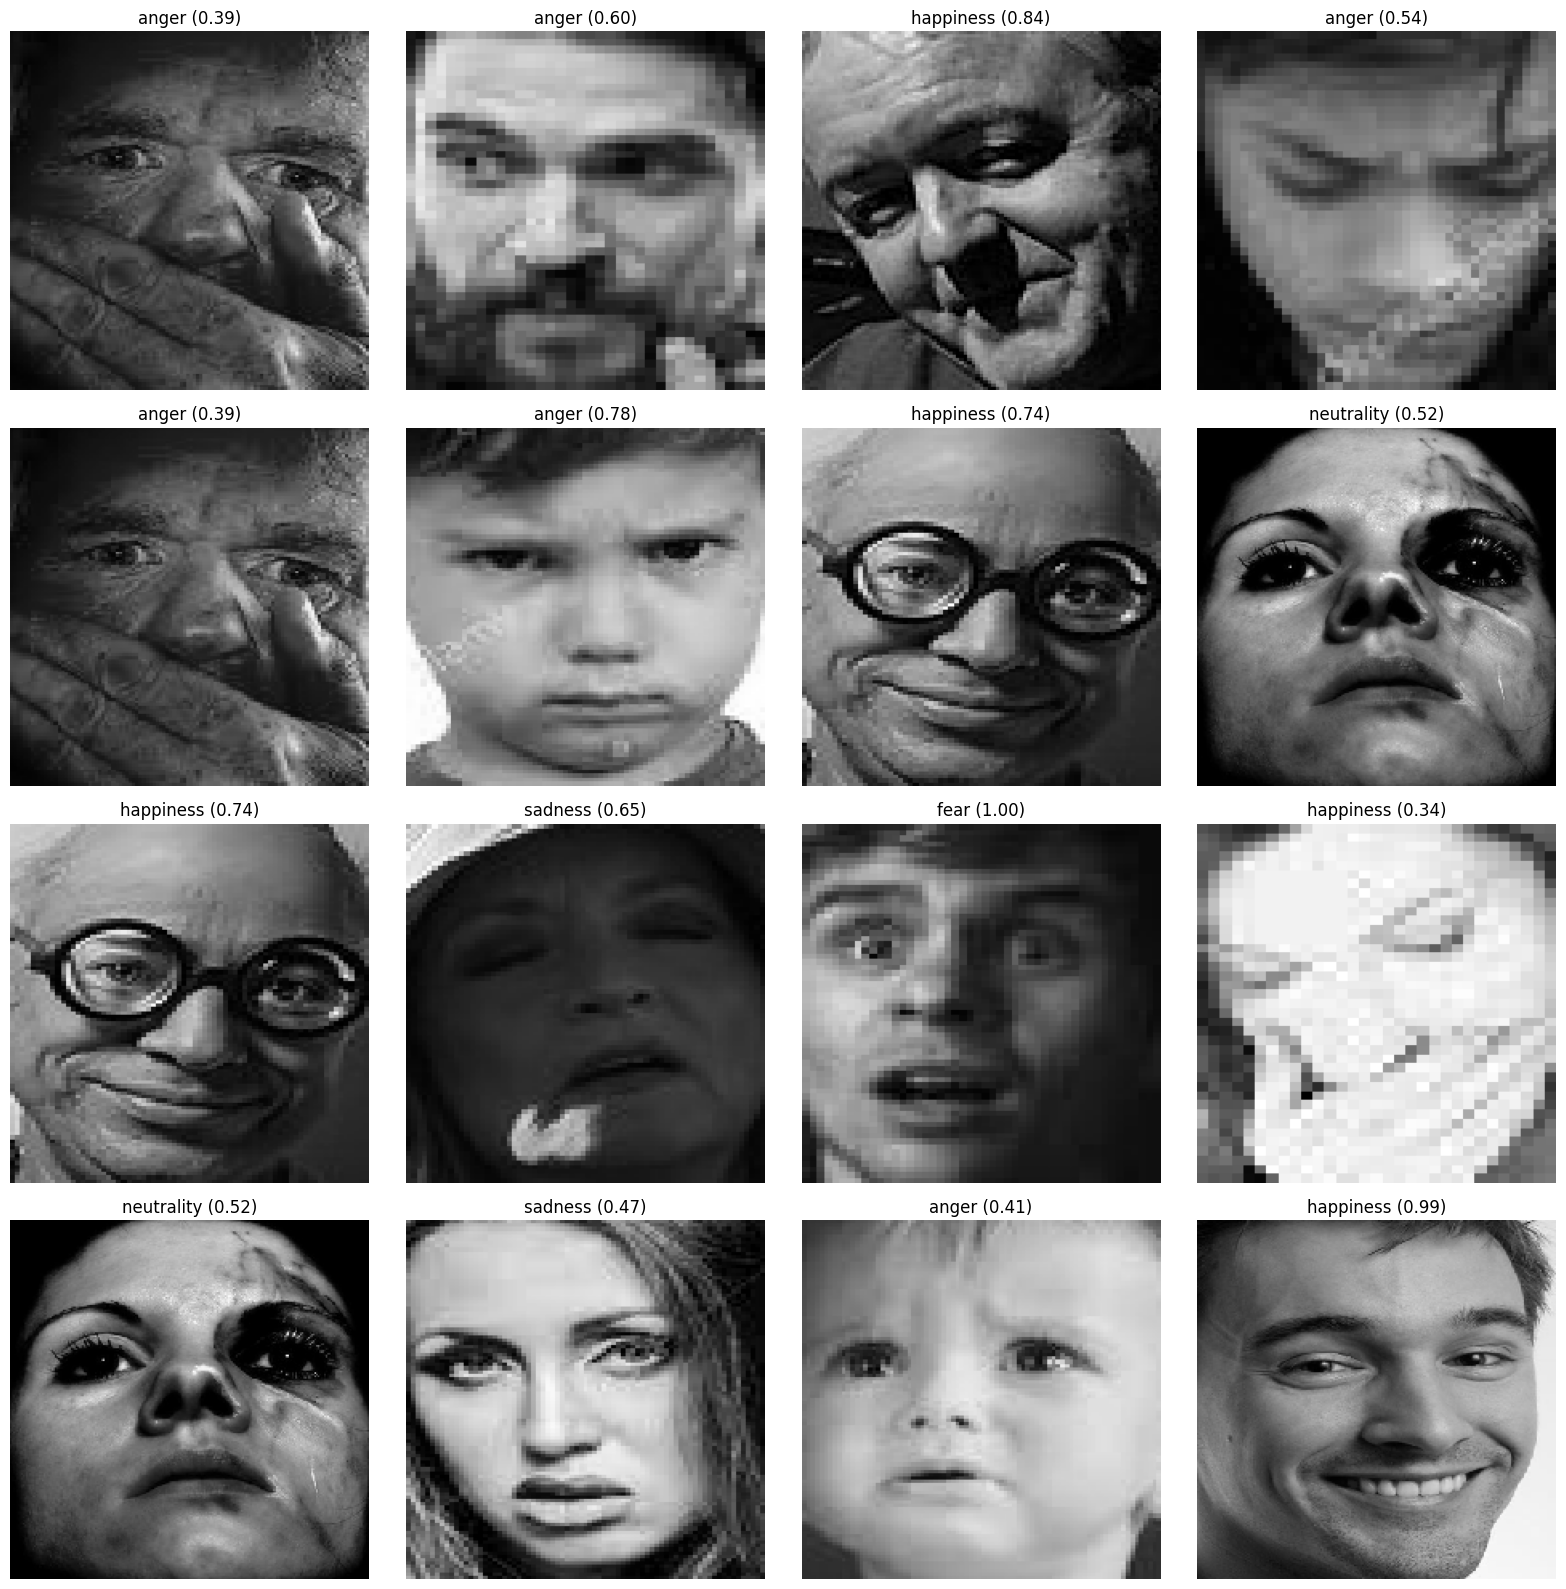

In [17]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained classification model
model = YOLO('runs/classify/Emotions_Datasets_yolo112/weights/best.pt')

# Test images directory
test_images_folders = 'datasets/Emotions_Datasets/test'

# Get list of image files
image_folders = os.listdir(test_images_folders)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_folder = random.choice(image_folders)
    img_files = os.listdir(os.path.join(test_images_folders,img_folder))
    img_path = os.path.join(test_images_folders, img_folder, random.choice(img_files))
    image = cv2.imread(img_path)

    # Perform classification inference
    results = model(img_path)  # returns a list with one result
    result = results[0]

    # Get predicted class name
    class_id = int(result.probs.top1)
    class_name = model.names[class_id]
    confidence = result.probs.top1conf.item()

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image with class name and confidence
    ax[idx].imshow(image_rgb)
    ax[idx].set_title(f"{class_name} ({confidence:.2f})", fontsize=12)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
